## Solar Power Prediction using Linear Regression Model

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns

In [5]:
# Load the dataset
df = pd.read_csv(r"C:\Users\Akhila\Downloads\solarpowergeneration.csv")
# Display the first few rows of the dataset
df

,temperature,irradiance,humidity,wind_speed,cloud_coverage,sunshine_hours,ambient_pressure,panel_tilt_angle,generated_power_kw
0,32.483571,333.986066,27.525505,6.483180,14.346946,5.612647,1006.443123,25.857526,0.883313
1,29.308678,283.654272,12.937709,0.741054,15.144552,7.270762,1010.642888,34.318115,1.001909
2,33.238443,709.144200,18.642060,3.754689,43.277148,5.140222,1003.605368,32.065621,1.026839
3,37.615149,765.180581,37.108852,8.038145,59.567982,0.325280,1024.192449,29.913749,0.457042
4,28.829233,225.268916,74.206854,4.334722,8.061541,9.402018,1010.055442,13.401613,1.679841
...,...,...,...,...,...,...,...,...,...
995,28.594499,424.546572,80.188036,0.792803,18.430140,4.673216,1033.538187,22.395834,0.739856
996,38.988433,365.594063,41.152395,5.658506,3.936188,11.420429,1004.874542,22.168582,1.678467
997,33.204214,613.258103,53.340877,9.080185,2.184671,3.836650,1034.052974,30.386555,0.786258
998,27.144105,204.404639,87.445265,3.963126,77.448560,10.417178,1013.348879,12.012812,1.016278


In [7]:
df.head()

,temperature,irradiance,humidity,wind_speed,cloud_coverage,sunshine_hours,ambient_pressure,panel_tilt_angle,generated_power_kw
0,32.483571,333.986066,27.525505,6.483180,14.346946,5.612647,1006.443123,25.857526,0.883313
1,29.308678,283.654272,12.937709,0.741054,15.144552,7.270762,1010.642888,34.318115,1.001909
2,33.238443,709.144200,18.642060,3.754689,43.277148,5.140222,1003.605368,32.065621,1.026839
3,37.615149,765.180581,37.108852,8.038145,59.567982,0.325280,1024.192449,29.913749,0.457042
4,28.829233,225.268916,74.206854,4.334722,8.061541,9.402018,1010.055442,13.401613,1.679841


In [6]:
df.tail()

,temperature,irradiance,humidity,wind_speed,cloud_coverage,sunshine_hours,ambient_pressure,panel_tilt_angle,generated_power_kw
995,28.594499,424.546572,80.188036,0.792803,18.430140,4.673216,1033.538187,22.395834,0.739856
996,38.988433,365.594063,41.152395,5.658506,3.936188,11.420429,1004.874542,22.168582,1.678467
997,33.204214,613.258103,53.340877,9.080185,2.184671,3.836650,1034.052974,30.386555,0.786258
998,27.144105,204.404639,87.445265,3.963126,77.448560,10.417178,1013.348879,12.012812,1.016278
999,32.862914,206.131226,15.325178,2.963258,13.443343,10.575008,999.244891,27.811173,1.194121


In [8]:
df.head(10)

,temperature,irradiance,humidity,wind_speed,cloud_coverage,sunshine_hours,ambient_pressure,panel_tilt_angle,generated_power_kw
0,32.483571,333.986066,27.525505,6.483180,14.346946,5.612647,1006.443123,25.857526,0.883313
1,29.308678,283.654272,12.937709,0.741054,15.144552,7.270762,1010.642888,34.318115,1.001909
2,33.238443,709.144200,18.642060,3.754689,43.277148,5.140222,1003.605368,32.065621,1.026839
3,37.615149,765.180581,37.108852,8.038145,59.567982,0.325280,1024.192449,29.913749,0.457042
4,28.829233,225.268916,74.206854,4.334722,8.061541,9.402018,1010.055442,13.401613,1.679841
5,28.829315,948.969797,55.763891,9.971824,93.956859,0.126159,1027.527555,31.618489,0.214070
6,37.896064,241.577027,51.013418,5.590593,75.513362,9.142679,1028.287479,25.009155,0.648544
7,33.837174,633.037068,33.479106,3.211622,58.662392,10.719654,1012.189540,36.822986,1.286538
8,27.652628,767.248416,84.540298,2.201113,82.843867,5.194079,1002.915513,37.596128,0.535880
9,32.712800,896.775299,41.761203,3.505205,8.018676,6.426510,992.141021,11.654698,0.832523


In [9]:
# to check the total number of rows and cols
df.shape

(1000, 9)

In [10]:
# Display summary
df.describe()

,temperature,irradiance,humidity,wind_speed,cloud_coverage,sunshine_hours,ambient_pressure,panel_tilt_angle,generated_power_kw
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,30.096660,602.919044,49.559599,4.932370,49.472687,5.972378,1012.458743,24.533042,0.882772
std,4.896080,230.685468,23.113574,2.856875,28.890916,3.486512,10.163475,8.634693,0.422706
min,13.793663,202.574611,10.000931,0.000307,0.022704,0.047020,984.004861,10.007288,0.000000
25%,26.762048,397.759291,30.521881,2.484212,24.045787,2.921531,1005.933121,17.006032,0.567747
50%,30.126503,612.900822,49.336848,4.895085,48.383138,5.924406,1012.410274,24.228584,0.879657
75%,33.239719,797.054906,69.090311,7.345057,74.949206,9.045763,1019.102276,31.817297,1.207970
max,49.263657,999.530981,89.825668,9.995577,99.694942,11.993528,1044.129102,39.922688,2.175952


In [11]:
# Check the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   temperature         1000 non-null   float64
 1   irradiance          1000 non-null   float64
 2   humidity            1000 non-null   float64
 3   wind_speed          1000 non-null   float64
 4   cloud_coverage      1000 non-null   float64
 5   sunshine_hours      1000 non-null   float64
 6   ambient_pressure    1000 non-null   float64
 7   panel_tilt_angle    1000 non-null   float64
 8   generated_power_kw  1000 non-null   float64
dtypes: float64(9)
memory usage: 70.4 KB


In [12]:
# Check for the missing values
df.isnull().sum()

temperature           0
irradiance            0
humidity              0
wind_speed            0
cloud_coverage        0
sunshine_hours        0
ambient_pressure      0
panel_tilt_angle      0
generated_power_kw    0
dtype: int64

In [13]:
# Check duplicate values
df.duplicated().sum()

np.int64(0)

In [14]:
df.columns

Index(['temperature', 'irradiance', 'humidity', 'wind_speed', 'cloud_coverage',
       'sunshine_hours', 'ambient_pressure', 'panel_tilt_angle',
       'generated_power_kw'],
      dtype='object')

In [15]:
import matplotlib.pyplot as plt

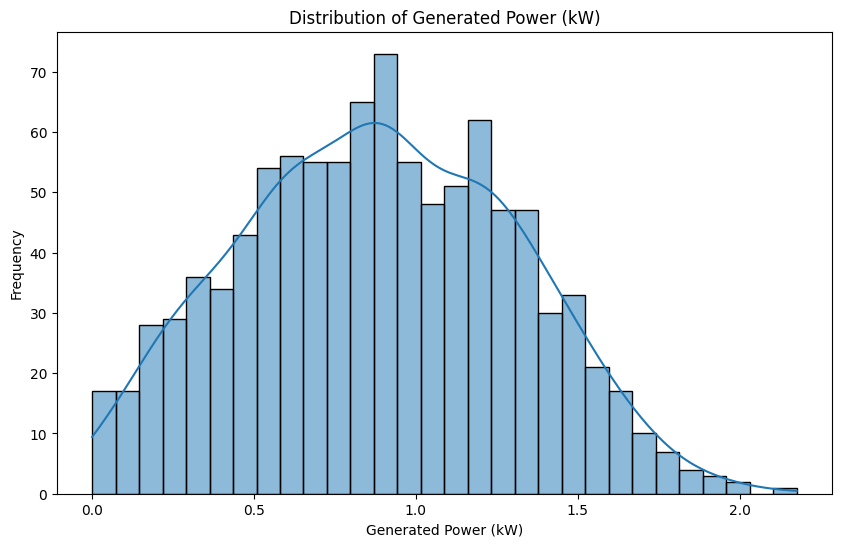

In [16]:
# Plot distribution of power
plt.figure(figsize=(10, 6))
sns.histplot(df['generated_power_kw'], bins=30, kde=True)
plt.title('Distribution of Generated Power (kW)')
plt.xlabel('Generated Power (kW)')
plt.ylabel('Frequency')
plt.show()


### EDA

# histograms for remaining columns


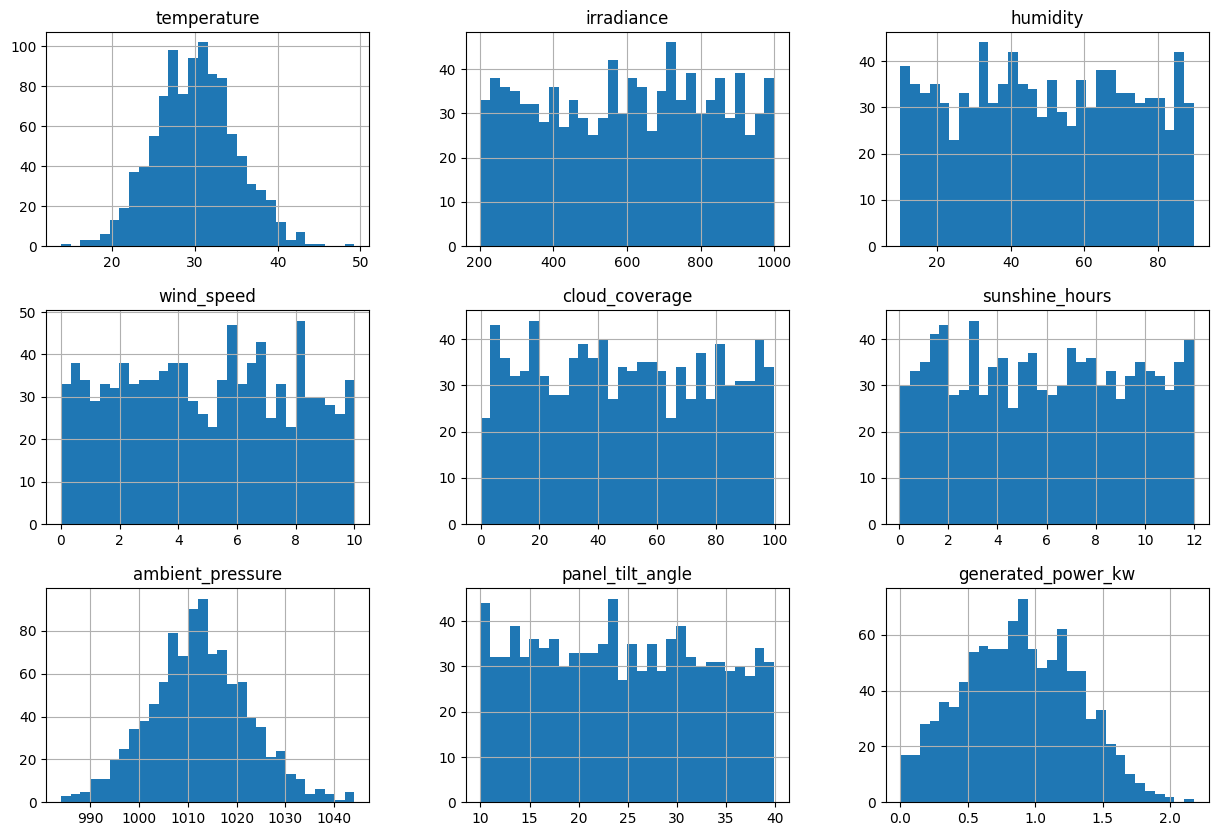

In [17]:
df[df.columns[:9]].hist(bins=30, figsize=(15, 10))
plt.show()

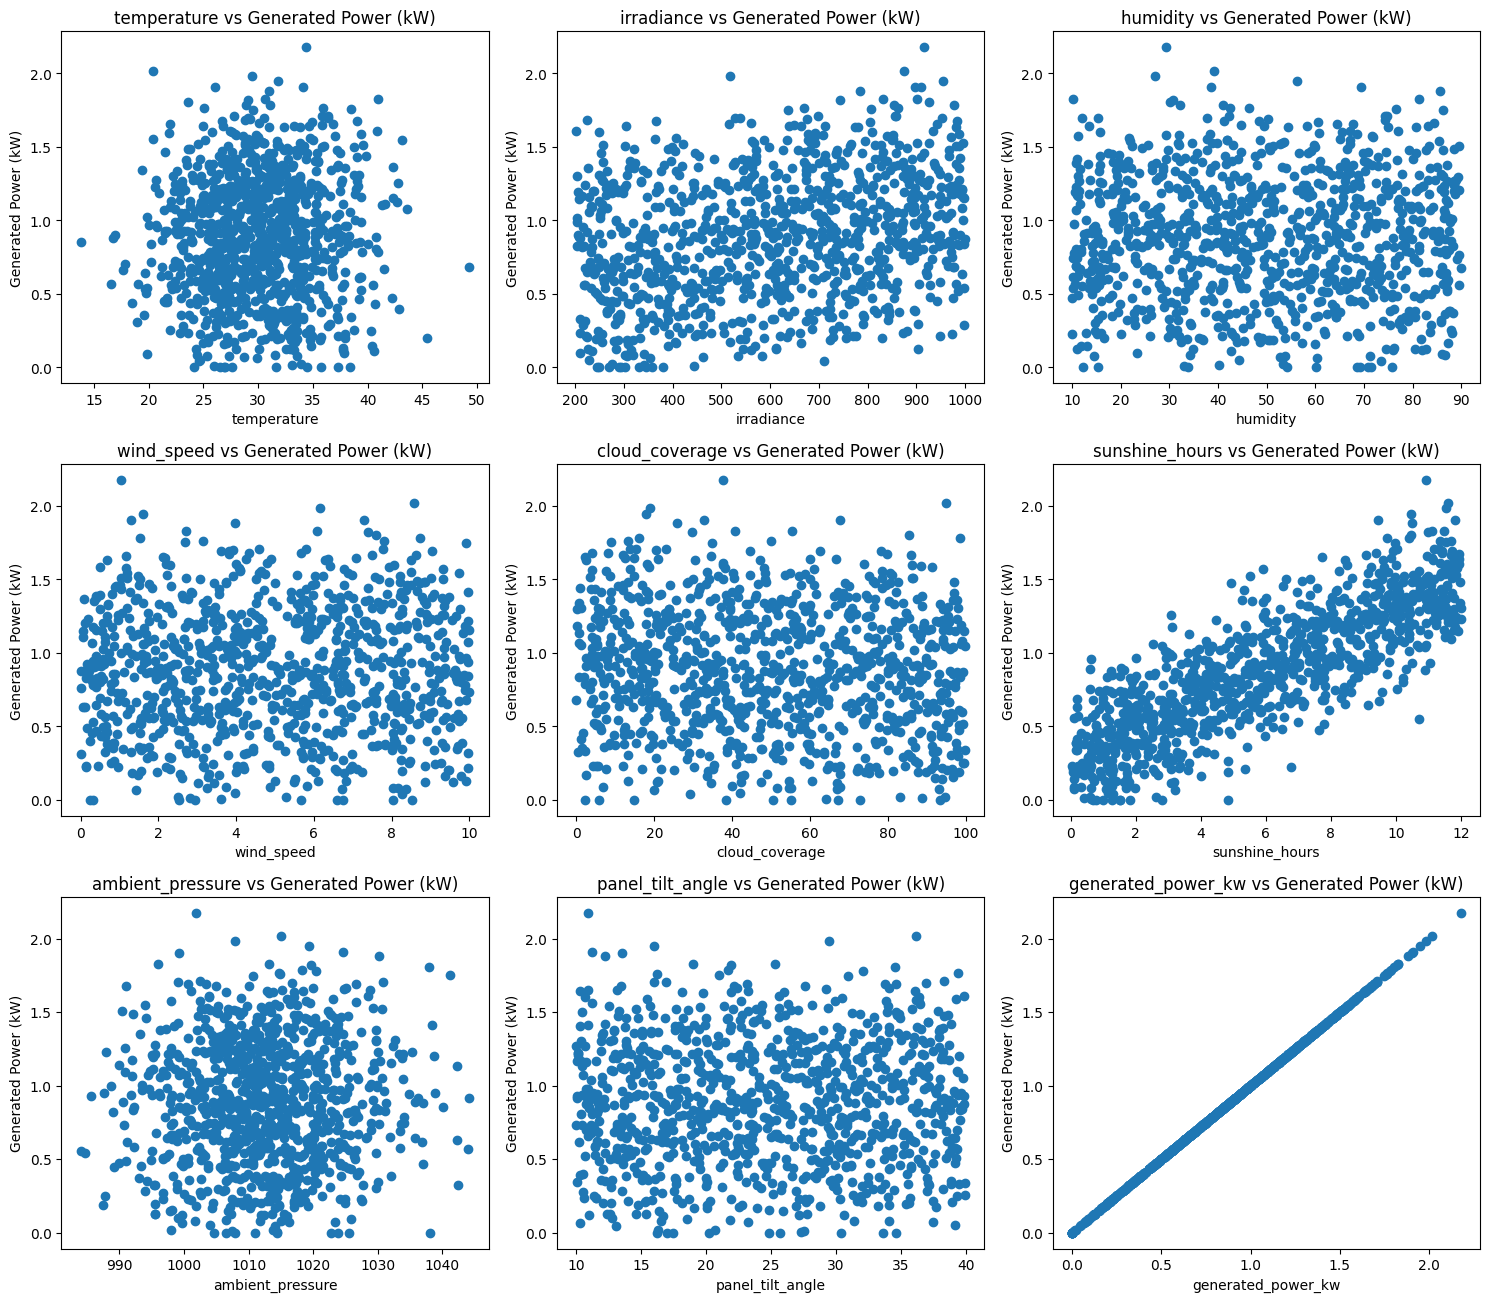

In [20]:
# Bivariate analysis
# Scatter plot with target feature
plt.figure(figsize=(15, 30))
for i, column in enumerate(df.columns):
    plt.subplot(7, 3, i+1)
    plt.scatter(df[column], df['generated_power_kw'])
    plt.title(f'{column} vs Generated Power (kW)')
    plt.xlabel(column)
    plt.ylabel('Generated Power (kW)')
plt.tight_layout()
plt.show()

In [21]:
df.corr()

,temperature,irradiance,humidity,wind_speed,cloud_coverage,sunshine_hours,ambient_pressure,panel_tilt_angle,generated_power_kw
temperature,1.000000,0.023820,0.004823,0.006160,0.022138,0.012434,-0.029159,0.011032,0.032163
irradiance,0.023820,1.000000,-0.004598,-0.024429,0.023410,0.003531,0.037114,0.028165,0.273384
humidity,0.004823,-0.004598,1.000000,-0.025757,0.006324,-0.011343,0.054788,-0.008832,0.008629
wind_speed,0.006160,-0.024429,-0.025757,1.000000,-0.041063,0.059633,-0.061209,0.005616,0.021403
cloud_coverage,0.022138,0.023410,0.006324,-0.041063,1.000000,-0.042329,-0.047462,0.052504,-0.091611
sunshine_hours,0.012434,0.003531,-0.011343,0.059633,-0.042329,1.000000,-0.015459,-0.008718,0.820802
ambient_pressure,-0.029159,0.037114,0.054788,-0.061209,-0.047462,-0.015459,1.000000,-0.037044,0.030317
panel_tilt_angle,0.011032,0.028165,-0.008832,0.005616,0.052504,-0.008718,-0.037044,1.000000,0.008655
generated_power_kw,0.032163,0.273384,0.008629,0.021403,-0.091611,0.820802,0.030317,0.008655,1.000000


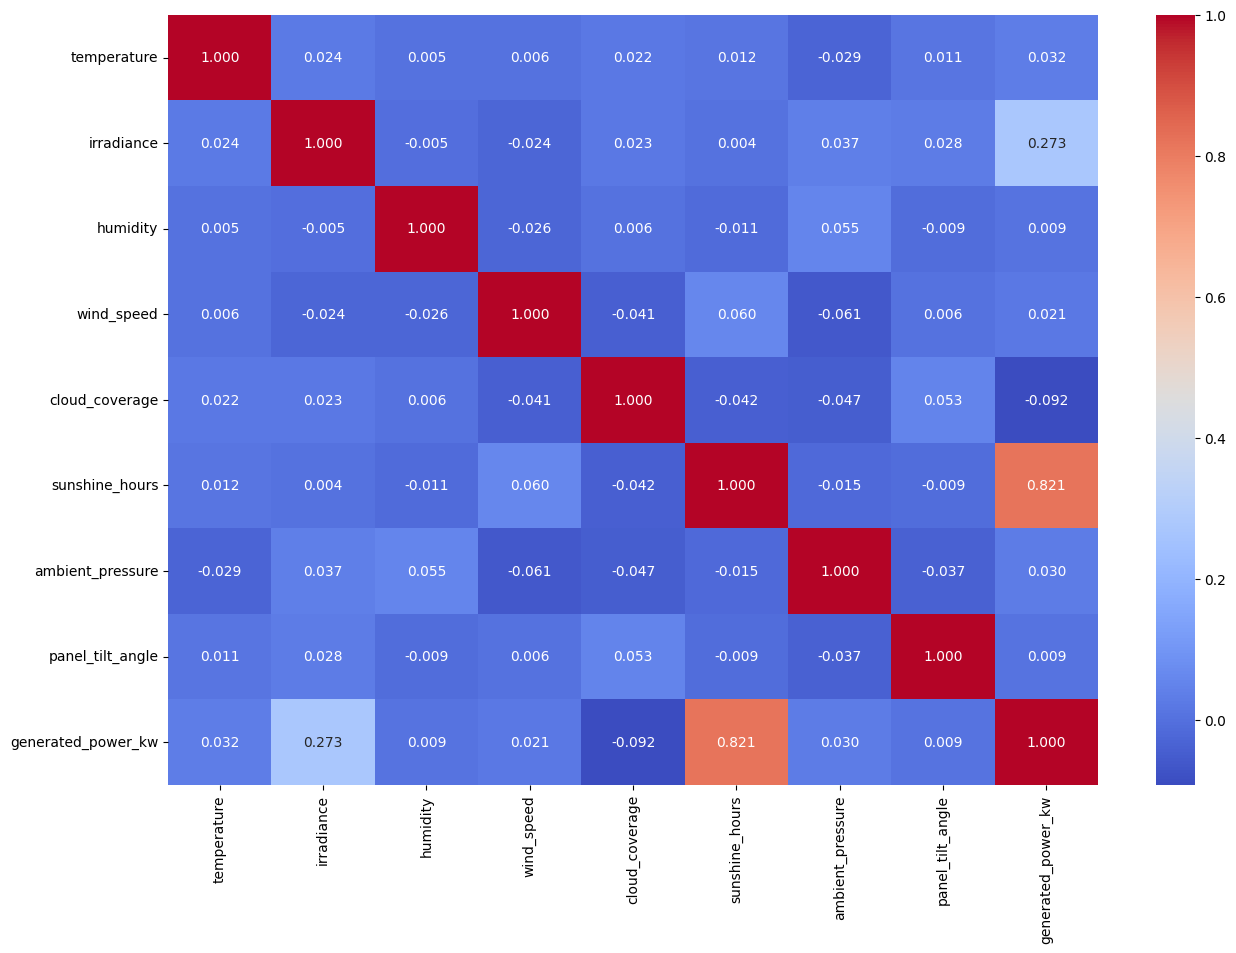

In [22]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt='.3f')
plt.show()

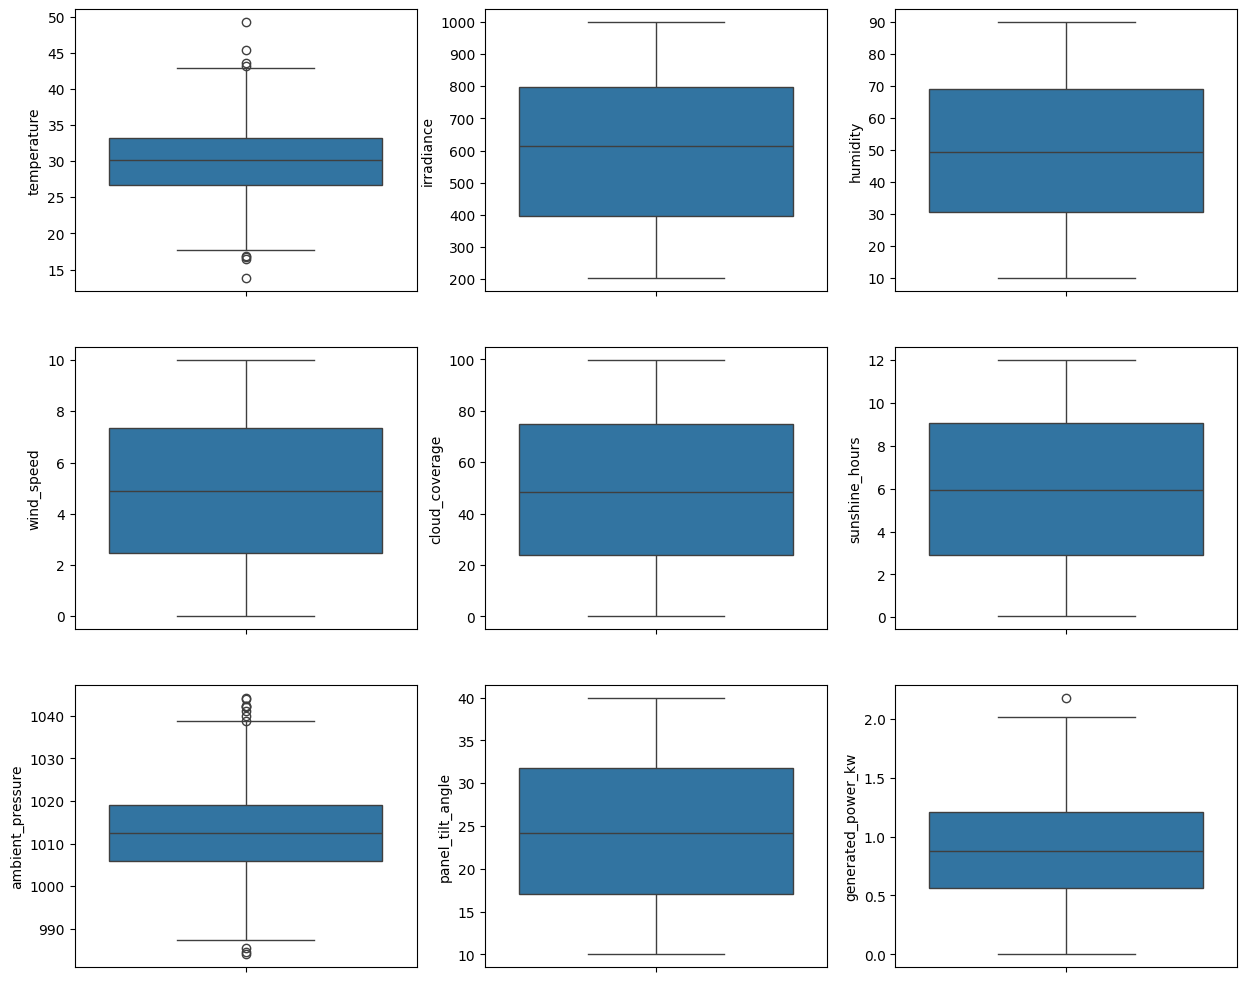

In [23]:
# Outlier
plt.figure(figsize=(15, 30))
for i, column in enumerate(df.columns):
    plt.subplot(7, 3, i+1)
    sns.boxplot(df[column])
plt.show()

## ML for Solar Power Output

## Let's build Machine Learning Model to Predict the Solar Power Generation

pip install scikit-learn

In [24]:
# Linear Regression Model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [25]:
df.columns

Index(['temperature', 'irradiance', 'humidity', 'wind_speed', 'cloud_coverage',
       'sunshine_hours', 'ambient_pressure', 'panel_tilt_angle',
       'generated_power_kw'],
      dtype='object')

In [26]:
# Splitting the dataset into features and target 
X = df.drop('generated_power_kw', axis=1)
y = df['generated_power_kw']

In [27]:
# Let's split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [35]:
# Train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predict on test set
y_pred = model.predict(X_test_scaled)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


MAE: 0.15
RMSE: 0.19
R² Score: 0.79


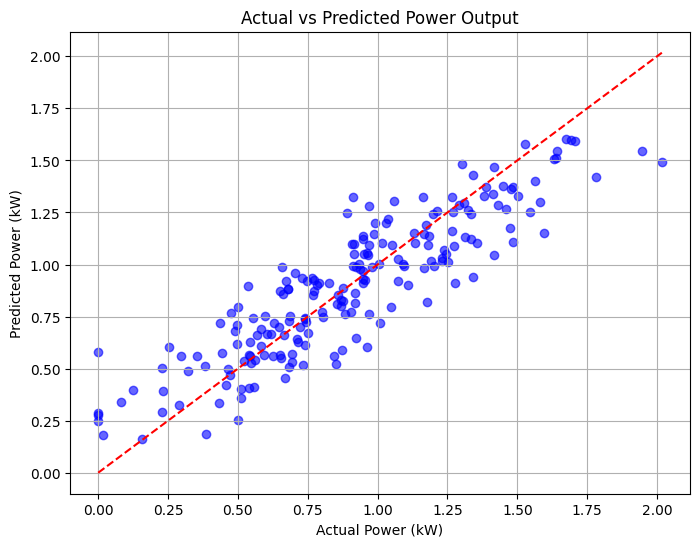

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Power (kW)')
plt.ylabel('Predicted Power (kW)')
plt.title('Actual vs Predicted Power Output')
plt.grid(True)
plt.show()


In [39]:
import pickle

# Save model
with open("solar_model.pkl", "wb") as f:
    pickle.dump(model, f)

# Save scaler
with open("powerscaler.pkl", "wb") as f:
    pickle.dump(scaler, f)
